In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from statannotations.Annotator import Annotator

In [12]:
cartography_df = pd.read_csv('measuring-hate-speech-uc-berk-data-cartography.csv', index_col=0)
cartography_df['agreement_factor'] = cartography_df['annotator_agreement_factor']
cartography_df['agreement_factor'] = cartography_df['agreement_factor'].apply(lambda x: 0.6 if x == 0.4 else x)
cartography_df.head()

,comment_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label_2_mean,label_2_std,label_2_last,label,hate_speech_score,pred,annotator_agreement_factor,confidence,variability,correctness,is_correct,agreement_factor
0,1,White people are trash.,0.020140,0.022018,0.001053,0.377354,0.098801,0.447086,0.602506,0.077299,0.551861,1,0.46,2,1.000000,0.377354,0.098801,0.4,False,1.000000
1,2,"You've caught the big gay, it's known to be ai...",0.239444,0.204430,0.004296,0.602787,0.245965,0.886680,0.157769,0.043542,0.109024,1,0.03,1,0.666667,0.602787,0.245965,0.8,True,0.666667
2,3,"I'm not saying you said that, I'm just saying ...",0.955142,0.052683,0.995866,0.042782,0.050853,0.003799,0.002076,0.001870,0.000335,0,-1.29,0,0.666667,0.955142,0.052683,1.0,True,0.666667
3,5,Fabrice Fabrice is ostensibly black or black/l...,0.966431,0.037558,0.998307,0.028787,0.032826,0.001335,0.004782,0.004764,0.000358,0,-2.84,0,1.000000,0.966431,0.037558,1.0,True,1.000000
4,6,First off you look cool as fuck! Anyway if we ...,0.059949,0.049668,0.002697,0.231664,0.164024,0.047617,0.708387,0.213079,0.949686,2,1.72,2,1.000000,0.708387,0.213079,1.0,True,1.000000


In [13]:
def round_agree_factor(agr_factor):
    if agr_factor <= 0.6:
        return 0.6
    elif agr_factor <= 0.8:
        return 0.8
    return 1.0

cartography_df['agreement_factor_rd'] = cartography_df['agreement_factor'].apply(lambda x: round_agree_factor(x))
cartography_df.head()

,comment_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label_2_mean,label_2_std,...,label,hate_speech_score,pred,annotator_agreement_factor,confidence,variability,correctness,is_correct,agreement_factor,agreement_factor_rd
0,1,White people are trash.,0.020140,0.022018,0.001053,0.377354,0.098801,0.447086,0.602506,0.077299,...,1,0.46,2,1.000000,0.377354,0.098801,0.4,False,1.000000,1.0
1,2,"You've caught the big gay, it's known to be ai...",0.239444,0.204430,0.004296,0.602787,0.245965,0.886680,0.157769,0.043542,...,1,0.03,1,0.666667,0.602787,0.245965,0.8,True,0.666667,0.8
2,3,"I'm not saying you said that, I'm just saying ...",0.955142,0.052683,0.995866,0.042782,0.050853,0.003799,0.002076,0.001870,...,0,-1.29,0,0.666667,0.955142,0.052683,1.0,True,0.666667,0.8
3,5,Fabrice Fabrice is ostensibly black or black/l...,0.966431,0.037558,0.998307,0.028787,0.032826,0.001335,0.004782,0.004764,...,0,-2.84,0,1.000000,0.966431,0.037558,1.0,True,1.000000,1.0
4,6,First off you look cool as fuck! Anyway if we ...,0.059949,0.049668,0.002697,0.231664,0.164024,0.047617,0.708387,0.213079,...,2,1.72,2,1.000000,0.708387,0.213079,1.0,True,1.000000,1.0


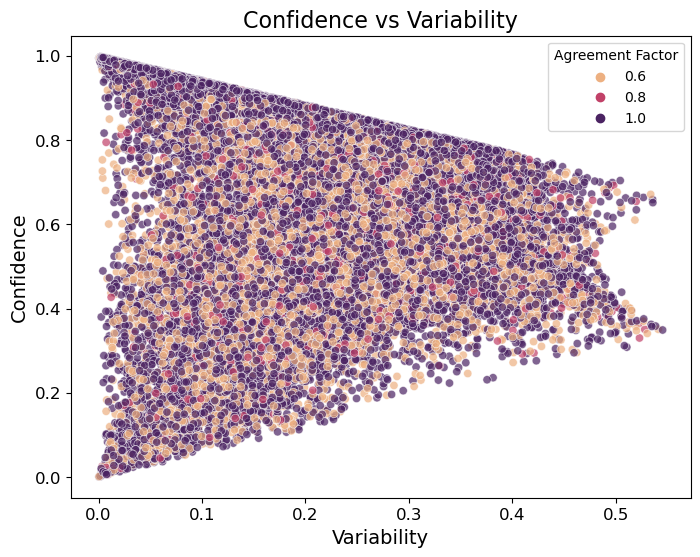

In [3]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='agreement_factor', palette='flare', alpha=0.7)

plt.title("Confidence vs Variability", fontsize=16)
plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/conf_vs_var_color_agreement_factor.png", dpi=600, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.6 vs. 0.8: Mann-Whitney-Wilcoxon test two-sided, P_val:1.003e-14 U_stat=6.421e+06
0.8 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.101e-40 U_stat=1.606e+07
0.6 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=7.963e+07


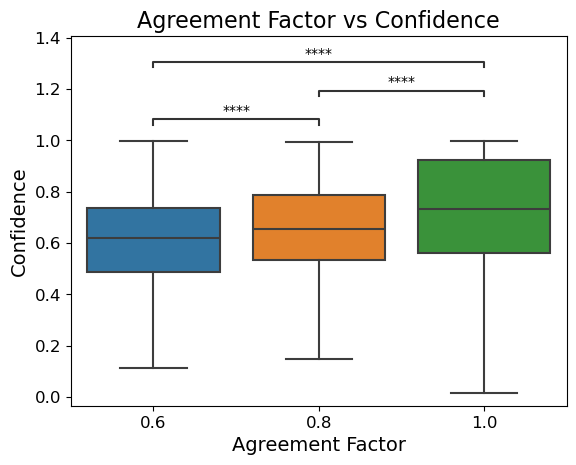

In [4]:
# sns.boxplot(data=cartography_df, x="agreement_factor", y="confidence")
# plt.title("Agreement Factor vs Confidence", fontsize=16)
# plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.savefig("agr_factor_vs_conf.png", dpi=600, bbox_inches='tight')

ax = sns.boxplot(data=cartography_df, x="agreement_factor", y="confidence", showfliers=False)

pairs=[(0.6, 0.8), (0.8, 1.0), (0.6, 1.0)]

annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.title("Agreement Factor vs Confidence", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/agr_factor_vs_conf.png", dpi=600, bbox_inches='tight')

In [15]:
cartography_df['label_text'] = cartography_df['label'].map({0: 'supportive', 1: 'neutral', 2: 'hate speech'})

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.6_0 vs. 1.0_0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.249e-121 U_stat=3.761e+06
0.6_1 vs. 1.0_1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.769e-01 U_stat=7.117e+06
0.6_2 vs. 1.0_2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.324e-05 U_stat=4.805e+06


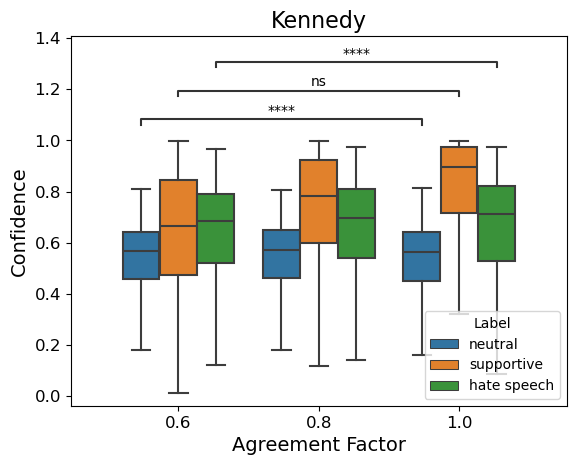

In [22]:
ax = sns.boxplot(data=cartography_df, x="agreement_factor_rd", y="confidence", hue='label_text', showfliers=False)

pairs=[ ((0.6, 0), (1.0, 0)), ((0.6, 1), (1.0, 1)), ((0.6, 2), (1.0, 2))]


annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence", hue='label')
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.title("Kennedy", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title = 'Label', loc='lower right')
plt.savefig("./plots/agr_factor_vs_conf_hue.png", dpi=600, bbox_inches='tight')

<Axes: xlabel='label', ylabel='Count'>

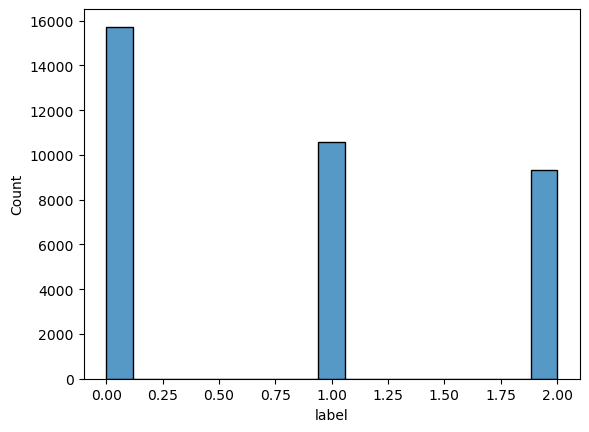

In [7]:
sns.histplot(cartography_df, x='label')

In [8]:
cartography_df['label'].value_counts()

0    15727
1    10562
2     9319
Name: label, dtype: int64

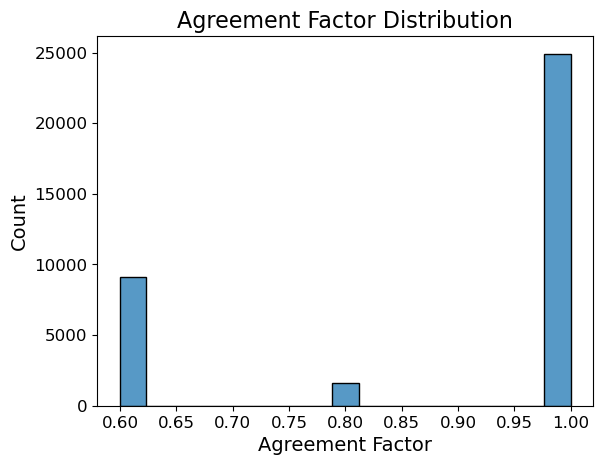

In [6]:
sns.histplot(data=cartography_df, x="agreement_factor")
plt.title("Agreement Factor Distribution", fontsize=16)
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/agr_factor_hist.png", dpi=600, bbox_inches='tight')

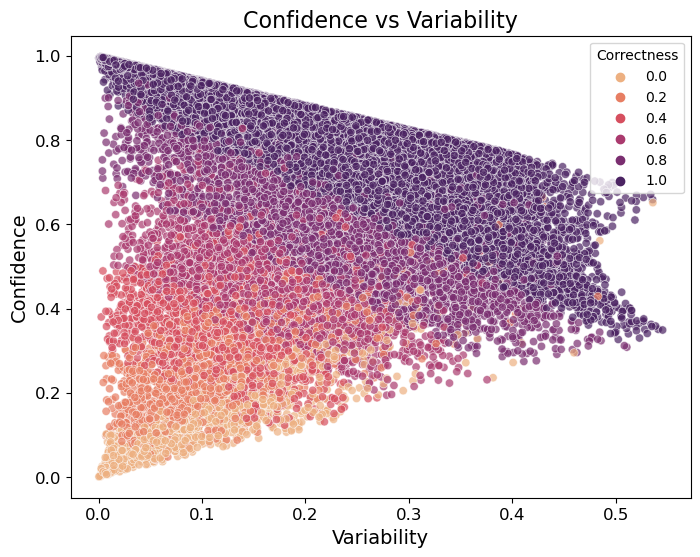

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='correctness', palette='flare', alpha=0.7)

plt.title("Confidence vs Variability", fontsize=16)
plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Correctness', loc='upper right')
plt.savefig("./plots/conf_vs_var_color_correctness.png", dpi=600, bbox_inches='tight')

In [8]:
def get_text_label(label):
    if label == 1:
        return 'Neutral'
    elif label == 2:
        return 'Hate Speech'
    else:
        return 'Supportive'
cartography_df['text_label'] = cartography_df['label'].apply(lambda x: get_text_label(x))

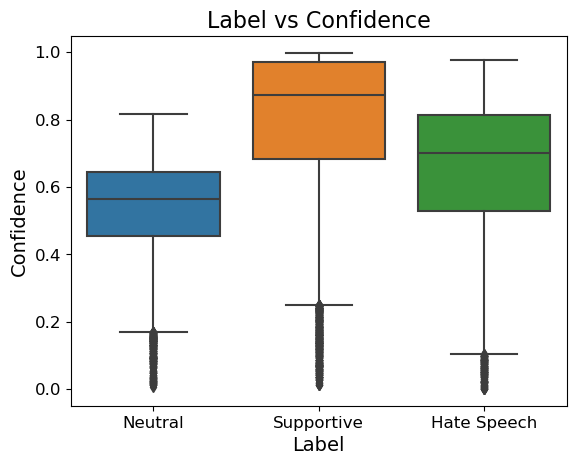

In [9]:
sns.boxplot(data=cartography_df, x="text_label", y="confidence")
plt.title("Label vs Confidence", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/label_vs_conf.png", dpi=600, bbox_inches='tight')

In [19]:
from scipy.stats import pearsonr

pearsonr(cartography_df['confidence'], cartography_df['agreement_factor_rd'])

PearsonRResult(statistic=0.200176008169689, pvalue=1.355015e-318)